In [ ]:
# install.packages("devtools")

In [ ]:
# install.packages("htmltools")

In [ ]:
# library(devtools); 
# install_github("therneau/survival")

In [ ]:
# library(devtools)
# install_local("survival_3.5-7.tar")

(a) Data Exploration and Pre-processing

In [3]:
library(survival)

In [4]:
data(pbc, package = "survival")


In [5]:
pbcseq

id,futime,status,trt,age,sex,day,ascites,hepato,spiders,edema,bili,chol,albumin,alk.phos,ast,platelet,protime,stage
<int>,<int>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
1,400,2,1,58.76523,f,0,1,1,1,1.0,14.5,261,2.60,1718,138.0,190,12.2,4
1,400,2,1,58.76523,f,192,1,1,1,1.0,21.3,NA,2.94,1612,6.2,183,11.2,4
2,5169,0,1,56.44627,f,0,0,1,1,0.0,1.1,302,4.14,7395,113.5,221,10.6,3
2,5169,0,1,56.44627,f,182,0,1,1,0.0,0.8,NA,3.60,2107,139.5,188,11.0,3
2,5169,0,1,56.44627,f,365,0,1,1,0.0,1.0,NA,3.55,1711,144.2,161,11.6,3
2,5169,0,1,56.44627,f,768,0,1,1,0.0,1.9,NA,3.92,1365,144.2,122,10.6,3
2,5169,0,1,56.44627,f,1790,1,1,1,0.5,2.6,230,3.32,1110,131.8,135,11.3,3
2,5169,0,1,56.44627,f,2151,1,1,1,1.0,3.6,NA,2.92,996,131.8,100,11.5,3
2,5169,0,1,56.44627,f,2515,1,1,1,1.0,4.2,NA,2.73,860,145.7,103,11.5,3


In [6]:
data <- pbcseq

In [7]:
names(data)

[1] "id"       "futime"   "status"   "trt"      "age"      "sex"     
 [7] "day"      "ascites"  "hepato"   "spiders"  "edema"    "bili"    
[13] "chol"     "albumin"  "alk.phos" "ast"      "platelet" "protime" 
[19] "stage"

### Kaplan Meier Estimator

(i) Creating a survival object where the event is the status (only considering 0 and 2, corresponding to alive or dead)

In [16]:
S = Surv(data$day, data$futime, ifelse(data$status == 2, 1, 0))

(ii) When we consider no censoring, we are assuming that our study is complete, and every individual's outcome is determined within the period of study. Empirical distribution of the random variable X gives us the distribution of our observed values. 

Answer: When no censoring, we have the complete data and outcomes, the Kaplan Meier Estimator is the empirical distribution function.

In [9]:
data$futime <- data$futime / 365
data$day <- data$day / 365

In [17]:
kap_drug <- survfit(S ~ trt, data = data)
kap_sex <- survfit(S ~ sex, data = data)

In [11]:
names(data)
str(data)

[1] "id"       "futime"   "status"   "trt"      "age"      "sex"     
 [7] "day"      "ascites"  "hepato"   "spiders"  "edema"    "bili"    
[13] "chol"     "albumin"  "alk.phos" "ast"      "platelet" "protime" 
[19] "stage"

'data.frame':	1945 obs. of  19 variables:
 $ id      : int  1 1 2 2 2 2 2 2 2 2 ...
 $ futime  : num  1.1 1.1 14.2 14.2 14.2 ...
 $ status  : int  2 2 0 0 0 0 0 0 0 0 ...
 $ trt     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ age     : num  58.8 58.8 56.4 56.4 56.4 ...
 $ sex     : Factor w/ 2 levels "m","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ day     : num  0 0.526 0 0.499 1 ...
 $ ascites : int  1 1 0 0 0 0 1 1 1 1 ...
 $ hepato  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ spiders : int  1 1 1 1 1 1 1 1 1 1 ...
 $ edema   : num  1 1 0 0 0 0 0.5 1 1 1 ...
 $ bili    : num  14.5 21.3 1.1 0.8 1 1.9 2.6 3.6 4.2 3.6 ...
 $ chol    : int  261 NA 302 NA NA NA 230 NA NA 244 ...
 $ albumin : num  2.6 2.94 4.14 3.6 3.55 3.92 3.32 2.92 2.73 2.8 ...
 $ alk.phos: int  1718 1612 7395 2107 1711 1365 1110 996 860 779 ...
 $ ast     : num  138 6.2 113.5 139.5 144.2 ...
 $ platelet: int  190 183 221 188 161 122 135 100 103 113 ...
 $ protime : num  12.2 11.2 10.6 11 11.6 10.6 11.3 11.5 11.5 11.5 ...
 $ stage   : int  4 4 3 3 3 3

In [14]:
data$trt <- as.factor(data$trt)

In [18]:
data

id,futime,status,trt,age,sex,day,ascites,hepato,spiders,edema,bili,chol,albumin,alk.phos,ast,platelet,protime,stage
<int>,<dbl>,<int>,<fct>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
1,1.095890,2,1,58.76523,f,0.0000000,1,1,1,1.0,14.5,261,2.60,1718,138.0,190,12.2,4
1,1.095890,2,1,58.76523,f,0.5260274,1,1,1,1.0,21.3,NA,2.94,1612,6.2,183,11.2,4
2,14.161644,0,1,56.44627,f,0.0000000,0,1,1,0.0,1.1,302,4.14,7395,113.5,221,10.6,3
2,14.161644,0,1,56.44627,f,0.4986301,0,1,1,0.0,0.8,NA,3.60,2107,139.5,188,11.0,3
2,14.161644,0,1,56.44627,f,1.0000000,0,1,1,0.0,1.0,NA,3.55,1711,144.2,161,11.6,3
2,14.161644,0,1,56.44627,f,2.1041096,0,1,1,0.0,1.9,NA,3.92,1365,144.2,122,10.6,3
2,14.161644,0,1,56.44627,f,4.9041096,1,1,1,0.5,2.6,230,3.32,1110,131.8,135,11.3,3
2,14.161644,0,1,56.44627,f,5.8931507,1,1,1,1.0,3.6,NA,2.92,996,131.8,100,11.5,3
2,14.161644,0,1,56.44627,f,6.8904110,1,1,1,1.0,4.2,NA,2.73,860,145.7,103,11.5,3


In [19]:
levels(data$trt)
levels(data$sex)

[1] "0" "1"

[1] "m" "f"

(iii) Build the Kaplan-Meier estimator for each level of the covariates drug and sex Survfit and plot the estimator for all of the levels of each covariate on the same figure. 

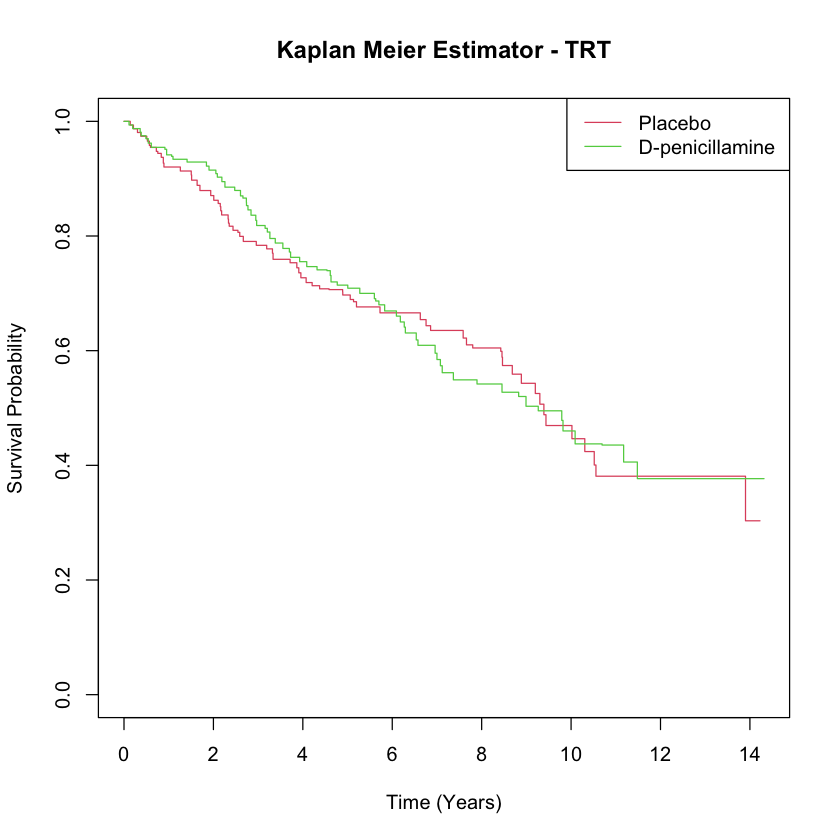

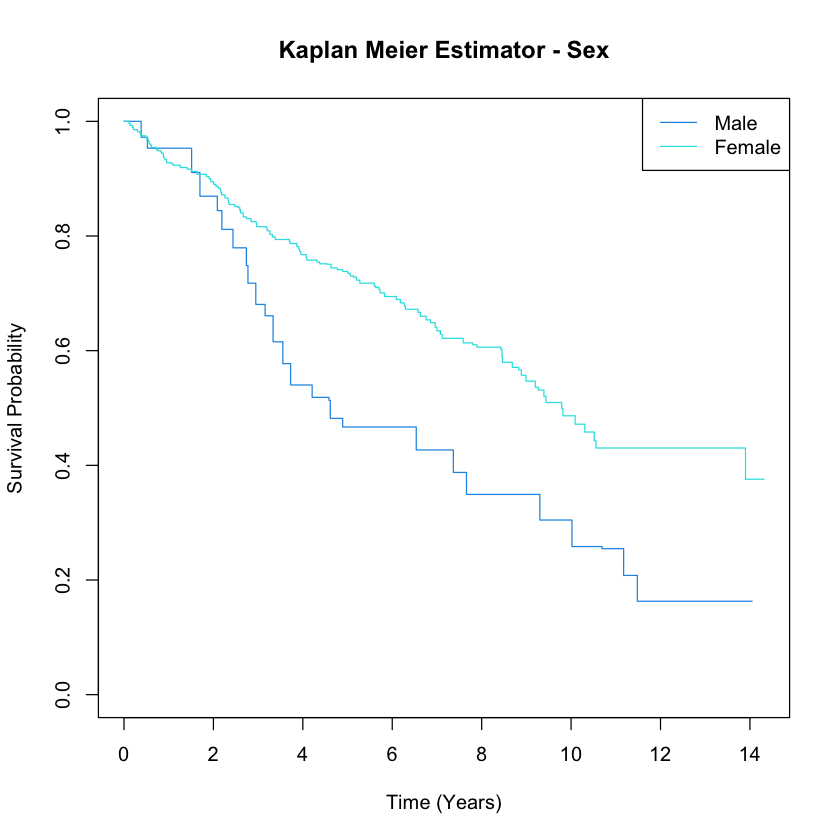

In [20]:
plot(kap_drug, col = 2:3, xlab = "Time (Years)", ylab = "Survival Probability", main = "Kaplan Meier Estimator - TRT")
legend("topright", legend = c("Placebo", "D-penicillamine"), col = 2:3, lty = 1)
plot(kap_sex, col = 4:5, xlab = "Time (Years)", ylab = "Survival Probability", main = "Kaplan Meier Estimator - Sex")
legend("topright", legend = c("Male", "Female"), col = 4:5, lty = 1)

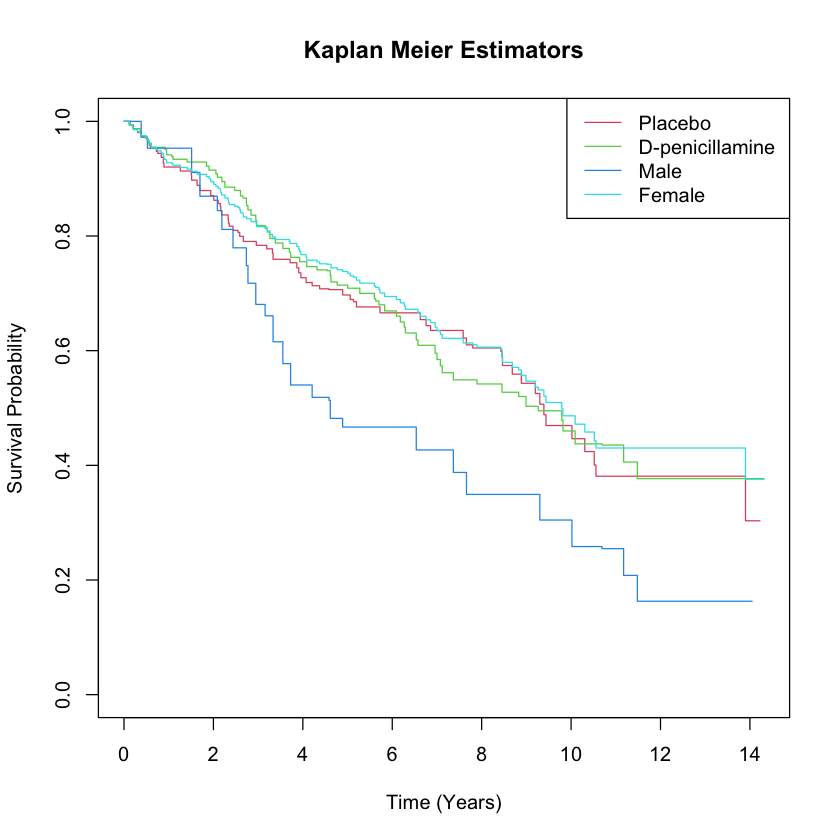

In [21]:
# Plot on same graph

plot(kap_drug, col = 2:3, xlab = "Time (Years)", ylab = "Survival Probability", main = "Kaplan Meier Estimators")
lines(kap_sex, col = 4:5)
legend("topright", legend = c("Placebo", "D-penicillamine", "Male", "Female"),col = c(2,3,4,5), lty = 1)

In [22]:
data

id,futime,status,trt,age,sex,day,ascites,hepato,spiders,edema,bili,chol,albumin,alk.phos,ast,platelet,protime,stage
<int>,<dbl>,<int>,<fct>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
1,1.095890,2,1,58.76523,f,0.0000000,1,1,1,1.0,14.5,261,2.60,1718,138.0,190,12.2,4
1,1.095890,2,1,58.76523,f,0.5260274,1,1,1,1.0,21.3,NA,2.94,1612,6.2,183,11.2,4
2,14.161644,0,1,56.44627,f,0.0000000,0,1,1,0.0,1.1,302,4.14,7395,113.5,221,10.6,3
2,14.161644,0,1,56.44627,f,0.4986301,0,1,1,0.0,0.8,NA,3.60,2107,139.5,188,11.0,3
2,14.161644,0,1,56.44627,f,1.0000000,0,1,1,0.0,1.0,NA,3.55,1711,144.2,161,11.6,3
2,14.161644,0,1,56.44627,f,2.1041096,0,1,1,0.0,1.9,NA,3.92,1365,144.2,122,10.6,3
2,14.161644,0,1,56.44627,f,4.9041096,1,1,1,0.5,2.6,230,3.32,1110,131.8,135,11.3,3
2,14.161644,0,1,56.44627,f,5.8931507,1,1,1,1.0,3.6,NA,2.92,996,131.8,100,11.5,3
2,14.161644,0,1,56.44627,f,6.8904110,1,1,1,1.0,4.2,NA,2.73,860,145.7,103,11.5,3


In [23]:
S2 <- Surv(data$futime, ifelse(data$status == 2, 1, 0))

In [24]:
alpha <- 0.05
lr_sex <- survdiff(S2 ~ data$sex)
lr_drug <- survdiff(S2 ~ data$trt)


In [27]:
summary(lr_sex)
summary(lr_drug)

p_val_sex <- lr_sex$pvalue
p_val_drug <- lr_drug$pvalue

cat(p_val_sex, p_val_drug)

       Length Class  Mode   
n      2      table  numeric
obs    2      -none- numeric
exp    2      -none- numeric
var    4      -none- numeric
chisq  1      -none- numeric
pvalue 1      -none- numeric
call   2      -none- call   

       Length Class  Mode   
n      2      table  numeric
obs    2      -none- numeric
exp    2      -none- numeric
var    4      -none- numeric
chisq  1      -none- numeric
pvalue 1      -none- numeric
call   2      -none- call   

3.036487e-11 0.9789314

(iv) The log-rank test focuses on time-to-event data and survival experiences, while the chi-square test, in general, examines associations in categorical data. The test statistic obtained from the log-rank test follows a chi-square distribution, establishing a relationship between the two. The chi-square statistic signifies the degree of divergence between observed and expected event counts over time, indicating differences in survival experiences between groups.

In [28]:
check_significance <- function(log_rank_test, group_name) 
{
  p_value <- log_rank_test$pvalue
  if (p_value < alpha) {

    cat("P - value: ", p_value,": Significant difference in survival between", group_name, "groups\n")
  } else {
    cat("P - value: ", p_value,": No significant difference in survival between", group_name, "groups\n")
  }
}

check_significance(lr_sex, "sex")
check_significance(lr_drug, "trt")

P - value:  3.036487e-11 : Significant difference in survival between sex groups
P - value:  0.9789314 : No significant difference in survival between trt groups


### Cox Proportional Hazard Model

In [29]:
data <- pbcseq

In [227]:
head(data)


,id,futime,status,trt,age,sex,day,ascites,hepato,spiders,edema,bili,chol,albumin,alk.phos,ast,platelet,protime,stage
,<int>,<int>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
1,1,400,2,1,58.76523,f,0,1,1,1,1,14.5,261,2.60,1718,138.0,190,12.2,4
2,1,400,2,1,58.76523,f,192,1,1,1,1,21.3,NA,2.94,1612,6.2,183,11.2,4
3,2,5169,0,1,56.44627,f,0,0,1,1,0,1.1,302,4.14,7395,113.5,221,10.6,3
4,2,5169,0,1,56.44627,f,182,0,1,1,0,0.8,NA,3.60,2107,139.5,188,11.0,3
5,2,5169,0,1,56.44627,f,365,0,1,1,0,1.0,NA,3.55,1711,144.2,161,11.6,3
6,2,5169,0,1,56.44627,f,768,0,1,1,0,1.9,NA,3.92,1365,144.2,122,10.6,3


(i) We will use log of the two covariates alkaline phosphate and platelet. Perform the conversion.

In [30]:
data$alk.phos <- log(data$alk.phos)
data$platelet <- log(data$platelet)
data$day <- data$day/365
data$futime <- data$futime/365

In [31]:
head(data)

,id,futime,status,trt,age,sex,day,ascites,hepato,spiders,edema,bili,chol,albumin,alk.phos,ast,platelet,protime,stage
,<int>,<dbl>,<int>,<int>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1.09589,2,1,58.76523,f,0.0000000,1,1,1,1,14.5,261,2.60,7.448916,138.0,5.247024,12.2,4
2,1,1.09589,2,1,58.76523,f,0.5260274,1,1,1,1,21.3,NA,2.94,7.385231,6.2,5.209486,11.2,4
3,2,14.16164,0,1,56.44627,f,0.0000000,0,1,1,0,1.1,302,4.14,8.908559,113.5,5.398163,10.6,3
4,2,14.16164,0,1,56.44627,f,0.4986301,0,1,1,0,0.8,NA,3.60,7.653020,139.5,5.236442,11.0,3
5,2,14.16164,0,1,56.44627,f,1.0000000,0,1,1,0,1.0,NA,3.55,7.444833,144.2,5.081404,11.6,3
6,2,14.16164,0,1,56.44627,f,2.1041096,0,1,1,0,1.9,NA,3.92,7.218910,144.2,4.804021,10.6,3


(ii) Impute the missing values in the data with the mean of each continuous covariate or the mode of each categorical covariate.

In [32]:
# missing_vals <- colSums(is.na(data))
missing_count <- sapply(data, function(x) sum(is.na(x)))
missing_table <- data.frame(Variables = names(data), Missing_Values = missing_count)
missing_table <- missing_table[missing_table$Missing_Values > 0, ]
# missing_vals
missing_table

,Variables,Missing_Values
,<chr>,<int>
ascites,ascites,60
hepato,hepato,61
spiders,spiders,58
chol,chol,821
alk.phos,alk.phos,60
platelet,platelet,73


In [33]:
for (col in names(data)) {
  if (is.numeric(data[[col]])) {
    data[[col]][is.na(data[[col]])] <- mean(data[[col]], na.rm = TRUE)
  }
}

for (col in names(data)) {
  if (is.factor(data[[col]])) {
    levels <- levels(data[[col]])
    mode <- levels[which.max(tabulate(match(data[[col]], levels)))]
    data[[col]][is.na(data[[col]])] <- mode
  }
}


(iii) Build an initial Cox Proportional Hazards (CPH) model with covariates drug (trt) and bilirubin based on the survival object for sensor data, S2.


In [34]:
S2 <- Surv(data$futime, ifelse(data$status == 2, 1, 0))

In [35]:
cox_model <- coxph(S2 ~ trt + bili, data = data)
summary(cox_model)

Call:
coxph(formula = S2 ~ trt + bili, data = data)

  n= 1945, number of events= 725 

          coef exp(coef)  se(coef)      z Pr(>|z|)    
trt  -0.077419  0.925502  0.074877 -1.034    0.301    
bili  0.080746  1.084096  0.004156 19.427   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     exp(coef) exp(-coef) lower .95 upper .95
trt     0.9255     1.0805    0.7992     1.072
bili    1.0841     0.9224    1.0753     1.093

Concordance= 0.746  (se = 0.009 )
Likelihood ratio test= 245.9  on 2 df,   p=<2e-16
Wald test            = 378.7  on 2 df,   p=<2e-16
Score (logrank) test = 442.8  on 2 df,   p=<2e-16


In [36]:
library(MASS)
base_model <- coxph(S2 ~ trt + bili, data = data)
full_model <- coxph(S2 ~ trt + age + sex + day + ascites + hepato + spiders + edema + bili + chol + albumin + alk.phos + ast + platelet + protime + stage, data = data)

stepwise_model <- stepAIC(base_model, scope = list(lower = base_model, upper = full_model), direction = "forward", trace = FALSE)

summary(stepwise_model)


Call:
coxph(formula = S2 ~ trt + bili + day + albumin + age + hepato + 
    edema + sex + stage + alk.phos + platelet + spiders + chol + 
    protime + ast, data = data)

  n= 1945, number of events= 725 

               coef  exp(coef)   se(coef)       z Pr(>|z|)    
trt      -0.1240693  0.8833187  0.0794843  -1.561 0.118541    
bili      0.0923225  1.0967184  0.0064384  14.339  < 2e-16 ***
day      -0.3802882  0.6836643  0.0187750 -20.255  < 2e-16 ***
albumin  -1.0123166  0.3633762  0.0913415 -11.083  < 2e-16 ***
age       0.0348453  1.0354595  0.0043669   7.979 1.47e-15 ***
hepato    0.4294625  1.5364315  0.0942796   4.555 5.23e-06 ***
edema     0.7900466  2.2034992  0.1279471   6.175 6.63e-10 ***
sexf     -0.4372872  0.6457860  0.1020352  -4.286 1.82e-05 ***
stage     0.2423312  1.2742162  0.0596100   4.065 4.80e-05 ***
alk.phos  0.2565758  1.2924968  0.0635551   4.037 5.41e-05 ***
platelet -0.3437606  0.7090987  0.0925051  -3.716 0.000202 ***
spiders   0.1614714  1.1752389  0.0837

In [37]:
final_formula <- formula(stepwise_model)
variables_used <- all.vars(final_formula)
variables_used

[1] "S2"       "trt"      "bili"     "day"      "albumin"  "age"     
 [7] "hepato"   "edema"    "sex"      "stage"    "alk.phos" "platelet"
[13] "spiders"  "chol"     "protime"  "ast"

(v) No, the type of drug (trt) p-value is 0.301, indicating non-significance.

(vi) Report the p-values for each of the covariates and the p-value for the overall significance of the model, provided by a χ^2 test.

In [38]:
summary_stepwise <- summary(stepwise_model)
p_values <- summary_stepwise$coefficients[, "Pr(>|z|)"]
covariates <- names(p_values)
p_values <- as.numeric(p_values)

covariates_table <- data.frame(Covariate = covariates, P_Value = p_values)

cat("Answer (vi): Report the p-values for each of the covariates and the p-value for the overall significance of the model: \n")
print(covariates_table)

Answer (vi): Report the p-values for each of the covariates and the p-value for the overall significance of the model: 
   Covariate      P_Value
1        trt 1.185408e-01
2       bili 1.241460e-46
3        day 3.204000e-91
4    albumin 1.520997e-28
5        age 1.470206e-15
6     hepato 5.233548e-06
7      edema 6.625133e-10
8       sexf 1.822055e-05
9      stage 4.797503e-05
10  alk.phos 5.412479e-05
11  platelet 2.023009e-04
12   spiders 5.386108e-02
13      chol 4.663454e-02
14   protime 8.429759e-02
15       ast 1.319339e-01


(vi) Overall p value: 2e-16

(vii) Using the model you obtained from stepAIC Mf, construct two CPH models: one with all variables in M f, and one with all variables excluding sex. This is to study the effect of the sex of the patients on their survival. Calculate the AICs of both of the models. Extract their AIC values and compare them.

In [39]:
formula_stepwise <- formula(stepwise_model)

model_all_variables <- coxph(formula_stepwise, data = data)

formula_without_sex <- update(formula_stepwise, . ~ . - sex)

model_without_sex <- coxph(formula_without_sex, data = data)

aic_all_variables <- AIC(model_all_variables)
aic_without_sex <- AIC(model_without_sex)

cat("AIC with all variables:", aic_all_variables, "\n")
cat("AIC without sex:", aic_without_sex, "\n")

if (aic_all_variables < aic_without_sex) {
  cat("Model with all variables has a lower AIC, therefore a better fit.\n")
} else {
  cat("Model excluding sex has a lower AIC, therefore a better fit. \n")
}


AIC with all variables: 8962.679 
AIC without sex: 8977.865 
Model with all variables has a lower AIC, therefore a better fit.


In [50]:
surv_with_sex <- survfit(model_all_variables, data = data)
surv_without_sex <- survfit(model_without_sex, data = data)

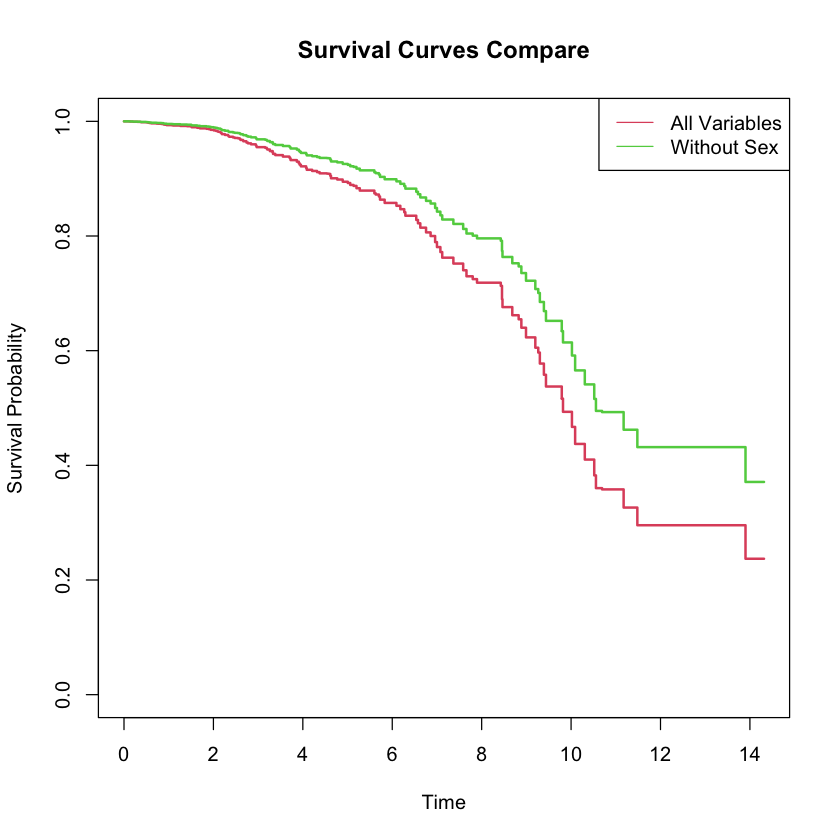

In [51]:
plot(surv_with_sex, col = 2, xlab = "Time", ylab = "Survival Probability",main = "Survival Curves Compare", lty = 1, lwd=2, mark.time = FALSE, conf.int = FALSE)
lines(surv_without_sex, col = 3, lty = 1, lwd=2,mark.time = FALSE, conf.int = FALSE)
legend("topright", legend = c("All Variables", "Without Sex"), col = 2:3, lty = 1)